In [ ]:
!pip install opencv-python

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [3]:
minst = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = minst.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


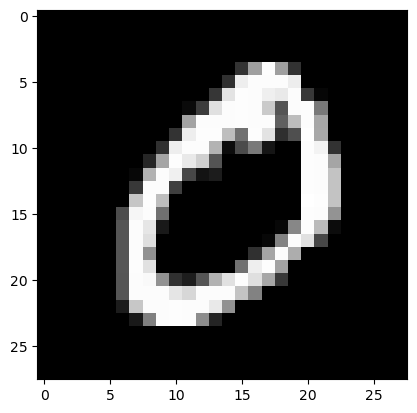

In [4]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
print(X_train.shape, X_test.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [8]:
model = MLPClassifier(hidden_layer_sizes=(10, 10), activation="relu", solver="adam",learning_rate_init= 0.01, max_iter=10, batch_size=32)
model.fit(X_train, y_train)

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(10, 10),
              learning_rate_init=0.01, max_iter=10)

In [9]:
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9042
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       980
           1       0.96      0.97      0.97      1135
           2       0.91      0.88      0.90      1032
           3       0.93      0.84      0.88      1010
           4       0.92      0.92      0.92       982
           5       0.89      0.79      0.84       892
           6       0.94      0.93      0.94       958
           7       0.88      0.94      0.91      1028
           8       0.85      0.87      0.86       974
           9       0.89      0.90      0.90      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



# Lets predict using tf and Keras

In [11]:
minst = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = minst.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [13]:
w, h = X_test.shape[1], X_test.shape[2]
X_train=X_train.reshape(-1, w, h, 1)
X_test=X_test.reshape(-1, w, h, 1)

X_train, X_test = X_train / 255.0, X_test / 255.0


In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)



c:\Users\Ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8621 - loss: 0.4482 - val_accuracy: 0.9761 - val_loss: 0.0798
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9775 - loss: 0.0749 - val_accuracy: 0.9850 - val_loss: 0.0467
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9881 - val_loss: 0.0363
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9877 - val_loss: 0.0353
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9897 - loss: 0.0311 - val_accuracy: 0.9883 - val_loss: 0.0355
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0465
0.9883000254631042


In [20]:
model.save('digits.h5')

In [22]:
saved_model = tf.keras.models.load_model('digits.h5')

In [26]:
import os
import cv2
import numpy as np
image_count=10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
prediction Value is :  0
Actual Value is : 


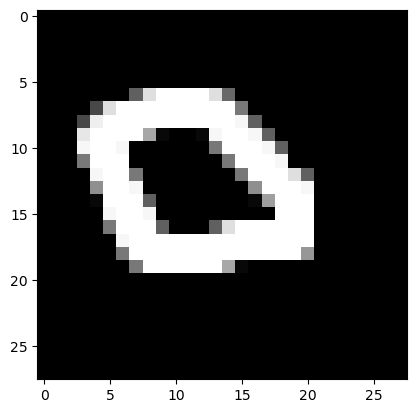

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
prediction Value is :  1
Actual Value is : 


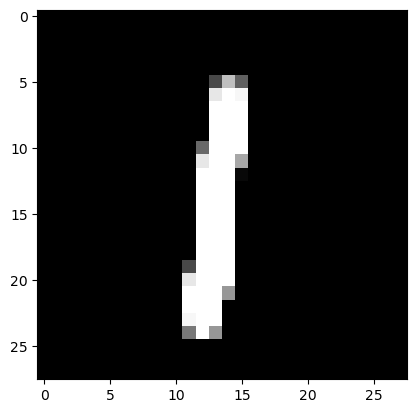

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
prediction Value is :  2
Actual Value is : 


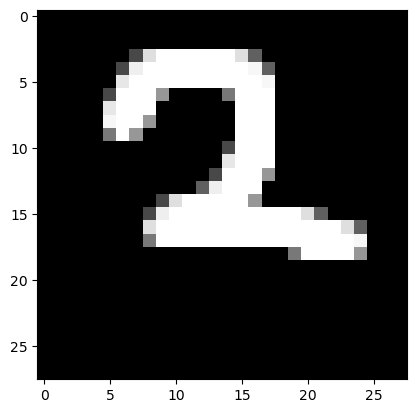

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
prediction Value is :  3
Actual Value is : 


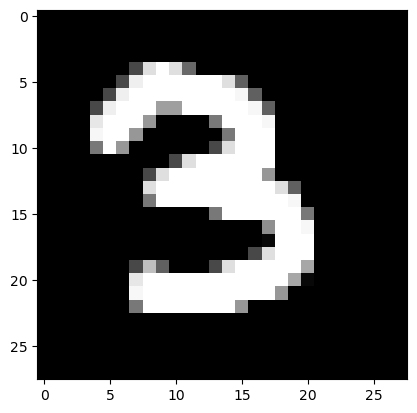

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
prediction Value is :  4
Actual Value is : 


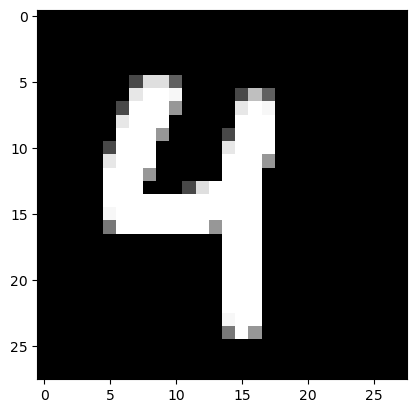

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
prediction Value is :  5
Actual Value is : 


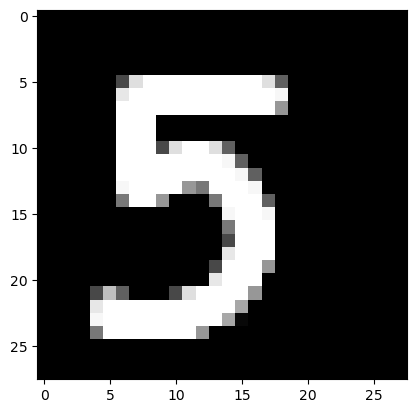

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
prediction Value is :  6
Actual Value is : 


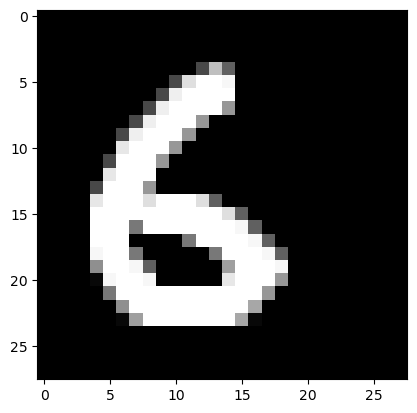

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
prediction Value is :  7
Actual Value is : 


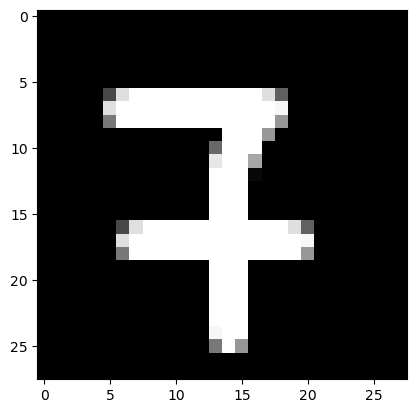

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
prediction Value is :  8
Actual Value is : 


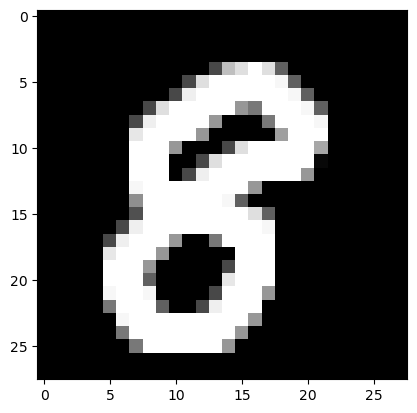

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
prediction Value is :  9
Actual Value is : 


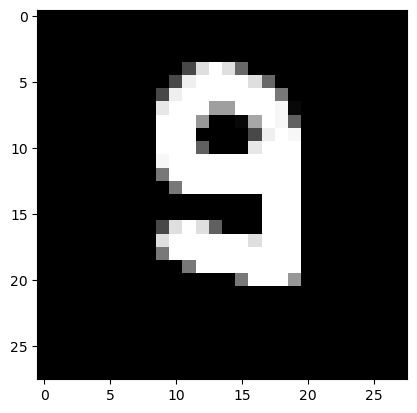

In [35]:
for i in range(image_count):
    file_path = f'./digits/image{i}.png'
    if not os.path.exists(file_path):
        continue
    image = np.array(cv2.imread(file_path)[:, :, 0])
    image = np.invert(image)
    image_r = image.reshape(-1, 28, 28, 1)
    prediction = saved_model.predict(image_r)

    y_pred = np.argmax(prediction)
    #if i==0:
        #print(y_pred)
    print("prediction Value is : ",y_pred)
    print("Actual Value is : ")
    plt.imshow(image, cmap='gray')
    plt.show()
    #plt.imshow(image, cmap='gray')
    #plt.show()
